In [1]:
import import_ipynb
import GenerateData
from GenerateData import Data
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

importing Jupyter notebook from GenerateData.ipynb


In [2]:
class PolynomialRegeression:
    '''
    Basic Class for Polynomial Regression to compare different paramaters and different approaches
    (using vs not using l2 regularization) 
    '''
    def __init__(self, deg = 1, gradient_desc = True, normal = False):
        '''
        Constructor
        '''  
        self.w = []                        #Weight Vector
        self.degree = deg                  #Degree of polynomial
        self.gradient_desc = gradient_desc #Gradient Descent to compute paramaters
        self.normal = normal               #Normal Equation to compute paramaters 
    
    def preprocessPolynomialFeatures(self, X):
        newX = [None]*len(X)
        for idx, i in enumerate(X):
            newX[idx] = [1]
            for j in range(0, self.degree):
                for k in i:
                    newX[idx].append(math.pow(k, j))
        
        return newX
        
    
    def predict(self, X):
        '''
        Function to predict, runs y(x, w)
        
        Params
        ======
            X (2D-Array): List of data-points by features
        '''
        result = 0
        for i in X:
            result += self.w.dot(i)
        return result
    
    def cost_function(self, X, y):
        '''
        Calculating Sum of Square Error
        
        Params
        ======
            X (2D-Array): List of data-points by features
            y (1D-Array): List of targets
        '''
        predictions = self.predict(X) #Get predictions

        sq_error = (predictions - y)**2 #Calculate square error
        
        return 1/2*sq_error.sum() 
    
    def visualizeData(self, X, y):
        '''
        Plotting data
        '''
        pred = []
        x = [i for i in range(0, len(X))]
        for i in X:
            pred.append(self.predict(X))
        plt.scatter(x,y, c='b')
        plt.scatter(x,pred, c='r')
        plt.show()
        
    def fit(self, X, y):
        '''
        Computing Paramaters
        
        Params
        ======
            X (2D-Array): List of data-points by features
            y (1D-Array): List of targets
        '''
        if len(X) == 0 or len(X[0]) == 0:
            raise ValueError('X must have a shape greater than 0 columns or 0 rows') 
        
        if len(X) != len(y):
            raise ValueError('X and y must have the same number of rows')
        
        self.w = np.random.randn(len(X[0])) #+1 for bias
        print(self.w)
        print(self.cost_function(X, y))
        if self.gradient_desc:
            alpha = 0.001
            tolerance = 1e-5
            decay = 0.0001
            cntr = 0
            while True:
                prevCost = self.cost_function(X, y)
                
                for index, i in enumerate(X):
                    new_Weights = [None]*len(self.w) #initialize array to be length of weight array
                    for idx in range(0, len(i)):
                        #New Weight = Weight - ALPHA*[derivative(Cost_Function) wrt w[idx]]
                        #Weights need to be update independently of each other
                        new_Weights[idx] = self.w[idx] - alpha*(self.w.dot(i) - y[idx])*X[index][idx]
                    
                self.w = np.array(new_Weights)
#                 alpha = alpha - decay*alpha
                cost = self.cost_function(X, y)
                cntr += 1
                print("Counter: ", cntr, "Cost: ", cost)
#                 if prevCost < cost:
#                     print("Error is minimized at weights: ", self.w, " Using a degree of: ", self.degree)
#                     break
                if prevCost - cost < tolerance:
                    break
        
        self.visualizeData(X, y)
        
                            
    

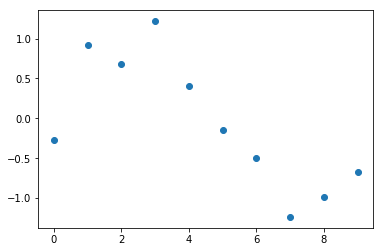

[[1, 1.0, 0.0, 0.0], [1, 1.0, 0.1, 0.010000000000000002], [1, 1.0, 0.2, 0.04000000000000001], [1, 1.0, 0.3, 0.09], [1, 1.0, 0.4, 0.16000000000000003], [1, 1.0, 0.5, 0.25], [1, 1.0, 0.6, 0.36], [1, 1.0, 0.7, 0.48999999999999994], [1, 1.0, 0.8, 0.6400000000000001], [1, 1.0, 0.9, 0.81]]


In [5]:
if __name__ == "__main__":
    fx = Data()
    fx.generateDataPopulation()
    model = PolynomialRegeression(deg = 3)
    X = model.preprocessPolynomialFeatures(fx.data['x'])
    y = fx.data['y']
    print(X)
#     model.fit(X, y)


In [11]:
a = np.array([1, 2, 3, 4])
b = np.array([2, 4, 1, 2])

print(a.dot(b))

21
